In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import SGDRegressor

In [3]:
sgd = SGDRegressor()

In [4]:
#some random data

X = [[-1], [0], [1], [2], [1.5]]
y = [0, 0, 1, 1, 1]

In [5]:
sgd.fit(X, y)

SGDRegressor()

In [6]:
sgd.predict([[-1]])

array([-0.10509187])

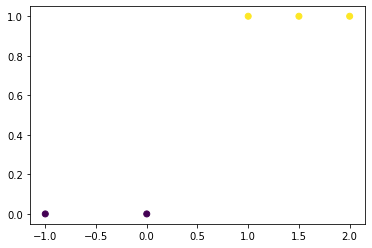

In [7]:
plt.scatter(X, y, c=y)

In [8]:
# From -4 to 4 take 6 equal distanced points
xs = np.linspace(-4, 4, 6)
xs

array([-4. , -2.4, -0.8,  0.8,  2.4,  4. ])

In [9]:
xs = np.linspace(-4, 4, 50)
xs

array([-4.        , -3.83673469, -3.67346939, -3.51020408, -3.34693878,
       -3.18367347, -3.02040816, -2.85714286, -2.69387755, -2.53061224,
       -2.36734694, -2.20408163, -2.04081633, -1.87755102, -1.71428571,
       -1.55102041, -1.3877551 , -1.2244898 , -1.06122449, -0.89795918,
       -0.73469388, -0.57142857, -0.40816327, -0.24489796, -0.08163265,
        0.08163265,  0.24489796,  0.40816327,  0.57142857,  0.73469388,
        0.89795918,  1.06122449,  1.2244898 ,  1.3877551 ,  1.55102041,
        1.71428571,  1.87755102,  2.04081633,  2.20408163,  2.36734694,
        2.53061224,  2.69387755,  2.85714286,  3.02040816,  3.18367347,
        3.34693878,  3.51020408,  3.67346939,  3.83673469,  4.        ])

In [10]:
ys = sgd.predict(xs.reshape(-1,1))

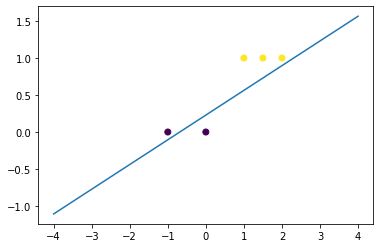

In [11]:
plt.scatter(X, y, c=y)
plt.plot(xs, ys)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr = LogisticRegression()

In [14]:
lr.fit(X, y)

LogisticRegression()

In [15]:
lr.coef_

array([[1.08075566]])

In [16]:
xs = np.linspace(-4, 4, 50)
ys = lr.predict(xs.reshape(-1,1))

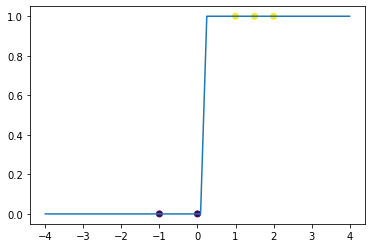

In [17]:
plt.scatter(X, y, c=y)
plt.plot(xs, ys)

In [18]:
from sklearn.datasets import make_moons, make_circles, make_classification

In [19]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)

X+= 2* np.random.uniform(size=X.shape)

In [20]:
X[:10], y[:10]

(array([[-1.46058992,  1.17593399],
        [ 0.81032685,  0.41288244],
        [ 1.82827511,  2.38699254],
        [ 1.24530927,  0.22445952],
        [ 1.31630828,  2.32519635],
        [ 1.51577476,  0.36398005],
        [-0.009533  ,  2.26022536],
        [ 2.18073792,  1.88018032],
        [ 2.44242369,  3.16316528],
        [ 0.53485966,  2.10702249]]),
 array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0]))

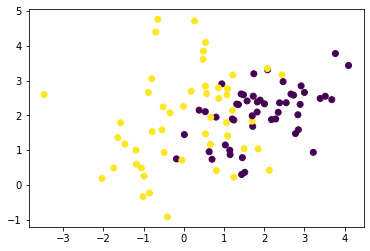

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [22]:
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

In [23]:
lr.score(X, y)

0.81

In [24]:
X, y = make_circles(noise = 0.2, factor=0.5)

In [25]:
X[:10], y[:10]

(array([[ 1.0376932 , -0.13517711],
        [ 0.70524492, -0.30045011],
        [-0.6426479 , -0.55218368],
        [ 0.1887542 , -0.75397275],
        [-0.02439244, -0.45050594],
        [ 1.08122365,  0.47184384],
        [-0.19617991, -0.4363487 ],
        [-0.89878838,  0.79273344],
        [ 0.25421806,  0.19349491],
        [ 0.57287868,  0.01457983]]),
 array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1], dtype=int64))

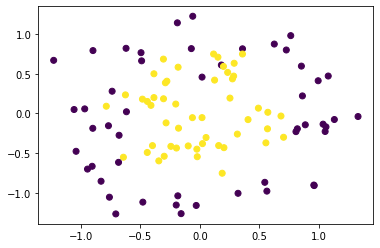

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [27]:
X, y = make_moons(noise= 0.3)

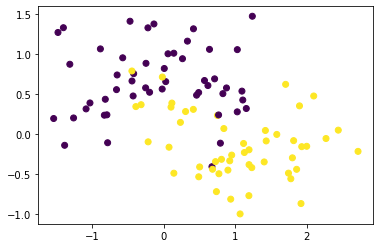

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [30]:
pipe = Pipeline([('pf', PolynomialFeatures(1)), ('lr', LogisticRegression())])
pipe

Pipeline(steps=[('pf', PolynomialFeatures(degree=1)),
                ('lr', LogisticRegression())])

In [31]:
pipe.fit(X, y)

Pipeline(steps=[('pf', PolynomialFeatures(degree=1)),
                ('lr', LogisticRegression())])

In [32]:
pipe.predict([X[0]])

array([0], dtype=int64)

In [33]:
data = pd.read_csv('archive/age_gender.csv')
X = []
for x in data.pixels:
    pxl = x.split(" ")
    X.append([int(p) for p in pxl])
X = np.array(X)
y = np.array(data.gender)

In [34]:
from sklearn.model_selection import train_test_split
nr_iters=[1, 5, 10, 20, 50, 100, 200, 500]
X_train, X_test, y_train, y_test = train_test_split(X, y)
train_scores = []
valid_scores = []
for niter in nr_iters:
    lr = LogisticRegression(max_iter=niter)
    lr.fit(X_train, y_train)
    train_scores.append(lr.score(X_train, y_train))
    valid_scores.append(lr.score(X_test, y_test))

c:\users\calin\desktop\ml\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\calin\desktop\ml\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

In [35]:
data = pd.read_csv("archive/IMDB_Dataset.csv")

In [36]:
data.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [37]:
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'])
X_train, X_test, y_train, y_test

(40988    The Thing About My Folks is a wonderful film a...
 33352    Irwin Allen was great. All of his TV shows had...
 25267    "Happenstance" is the most New York-feeling Pa...
 10296    The plot is very basic, but acceptable: A youn...
 12793    I admit - I was lured to this one from the hyp...
                                ...                        
 30599    The animation in this re-imagining of Peter & ...
 34924    I'm 15, usually not kids my age usually watch ...
 37235    What can you say after watching this movie? Th...
 8225     This is one of those rare movies, it's lovely ...
 11277    I had the pleasure of seeing this short film a...
 Name: review, Length: 37500, dtype: object,
 33633    while watching this piece of crap! The Day aft...
 8289     This film has great acting, great photography ...
 7922     Sony Pictures Classics, I'm looking at you! So...
 36957    Even a bad Julie Andrews Musical is worth watc...
 25728    I just saw this movie tonight, opening night.

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
cv = CountVectorizer()

In [40]:
test_data = ["The cat is on the table", "The dog is on the table", "The table is on the dog", "The table is on the cat",
              "cat cat cat the", "the the cat cat", "mouse dog cat", "the dog is on the cat"]

In [41]:
processed = cv.fit_transform(test_data)

In [42]:
processed.toarray()

array([[1, 0, 1, 0, 1, 1, 2],
       [0, 1, 1, 0, 1, 1, 2],
       [0, 1, 1, 0, 1, 1, 2],
       [1, 0, 1, 0, 1, 1, 2],
       [3, 0, 0, 0, 0, 0, 1],
       [2, 0, 0, 0, 0, 0, 2],
       [1, 1, 0, 1, 0, 0, 0],
       [1, 1, 1, 0, 1, 0, 2]], dtype=int64)

In [43]:
cv.vocabulary_

{'the': 6, 'cat': 0, 'is': 2, 'on': 4, 'table': 5, 'dog': 1, 'mouse': 3}

In [44]:
lr = LogisticRegression()

In [45]:
cv = CountVectorizer(ngram_range=(1,2))
X_transform = cv.fit_transform(X_train)

In [46]:
lr.fit(X_transform, y_train)

c:\users\calin\desktop\ml\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
lr.score(cv.transform(X_test), y_test)

0.9084

In [48]:
test_sentences = ["This movie sucks", "Tenet is the best movie ever", "I love to hate this movie", "I do not hate Inception, I actually like it"]

In [49]:
lr.predict(cv.transform(test_sentences))

array(['negative', 'positive', 'positive', 'negative'], dtype=object)

In [50]:
lr.predict_proba(cv.transform(test_sentences))

array([[0.71857403, 0.28142597],
       [0.1548651 , 0.8451349 ],
       [0.41050703, 0.58949297],
       [0.64931929, 0.35068071]])

In [51]:
from sklearn import datasets

In [52]:
data = datasets.fetch_20newsgroups()

In [56]:
data

{'data': ["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
  "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washingto

In [61]:
data.data

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
 "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 

In [63]:
data.DESCR

'.. _20newsgroups_dataset:\n\nThe 20 newsgroups text dataset\n------------------------------\n\nThe 20 newsgroups dataset comprises around 18000 newsgroups posts on\n20 topics split in two subsets: one for training (or development)\nand the other one for testing (or for performance evaluation). The split\nbetween the train and test set is based upon a messages posted before\nand after a specific date.\n\nThis module contains two loaders. The first one,\n:func:`sklearn.datasets.fetch_20newsgroups`,\nreturns a list of the raw texts that can be fed to text feature\nextractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`\nwith custom parameters so as to extract feature vectors.\nThe second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,\nreturns ready-to-use features, i.e., it is not necessary to use a feature\nextractor.\n\n**Data Set Characteristics:**\n\n    =================   ==========\n    Classes                     20\n    Samples total           

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
cv = CountVectorizer()

In [69]:
processed = cv.fit_transform(data.data)

In [70]:
processed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [71]:
cv.vocabulary_

{'from': 56979,
 'lerxst': 75358,
 'wam': 123162,
 'umd': 118280,
 'edu': 50527,
 'where': 124031,
 'my': 85354,
 'thing': 114688,
 'subject': 111322,
 'what': 123984,
 'car': 37780,
 'is': 68532,
 'this': 114731,
 'nntp': 87620,
 'posting': 95162,
 'host': 64095,
 'rac3': 98949,
 'organization': 90379,
 'university': 118983,
 'of': 89362,
 'maryland': 79666,
 'college': 40998,
 'park': 92081,
 'lines': 76032,
 '15': 4605,
 'was': 123292,
 'wondering': 124931,
 'if': 65798,
 'anyone': 28615,
 'out': 90774,
 'there': 114579,
 'could': 42876,
 'enlighten': 51793,
 'me': 80638,
 'on': 89860,
 'saw': 104813,
 'the': 114455,
 'other': 90686,
 'day': 45295,
 'it': 68766,
 'door': 48618,
 'sports': 109581,
 'looked': 76718,
 'to': 115475,
 'be': 32311,
 'late': 74693,
 '60s': 16574,
 'early': 50111,
 '70s': 18299,
 'called': 37433,
 'bricklin': 34995,
 'doors': 48620,
 'were': 123796,
 'really': 99822,
 'small': 108252,
 'in': 66608,
 'addition': 26073,
 'front': 56989,
 'bumper': 35612,
 'se

In [74]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)
X_train, X_test, y_train, y_test

(["From: c23reg@kocrsv01.delcoelect.com (Ron Gaskins)\nSubject: Re: Dumbest automotive concepts of all tim\nOriginator: c23reg@koptsw21\nKeywords: Dimmer switch location (repost)\nOrganization: Delco Electronics Corp.\nLines: 22\n\n\nIn article <1993Apr8.233443.22590@exu.ericsson.se>, exulox@exu.ericsson.se (Lasse Ohlsson, T/TDT, 1129) writes:\n> In article 23250@cas.org, sdm24@cas.org () writes:\n> >IMHO, the dumbest thing we *ever* did in copying the Japanese was moving the\n> >dimmer switch from the floor to the lever controlling the turn signal/cruise\n \nThe federal government has mandated that all passenger cars by model year\n'95 return to the floor mounted dimmer switch.\n\nA study by the National Highway Traffic Safety Administration (NHTSA) has\nfound that an unacceptable percentage of after dusk collisions were the\ndirect result of unskilled drivers getting their left foot stuck in the\nsteering wheel :-)\n\n-- \nRon Gaskins                                 c23reg@koptsw21.d

In [115]:
cv = CountVectorizer(ngram_range=(1,2))
X_transform = cv.fit_transform(X_train)

In [116]:
lr =LogisticRegression()

In [117]:
lr.fit(X_transform, y_train)

c:\users\calin\desktop\ml\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [119]:
lr.score(X_transform, y_train)
lr.score(cv.transform(X_test), y_test)


0.8861788617886179

In [120]:
nr_iters=[0, 1, 5, 10, 20, 50, 100, 200, 500]
train_scores = []
valid_scores = []
for niter in nr_iters:
    lr = LogisticRegression(max_iter=niter)
    lr.fit(X_transform, y_train)
    train_scores.append(lr.score(X_transform, y_train))
    valid_scores.append(lr.score(cv.transform(X_test), y_test))

train_scores, valid_scores

c:\users\calin\desktop\ml\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\calin\desktop\ml\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

([0.05468473777253978,
  0.05468473777253978,
  0.22144961697112553,
  0.5820860341779611,
  0.8289923394225103,
  0.9994107248084856,
  0.9998821449616971,
  0.9998821449616971,
  0.9998821449616971],
 [0.0512548603746907,
  0.0512548603746907,
  0.20607988688582538,
  0.5033580770590315,
  0.719688936019795,
  0.8738069989395546,
  0.8861788617886179,
  0.8812301166489925,
  0.880876634853305])